# 2020 Advent of code - Day 1

https://adventofcode.com/2020

## Part 1

--- Day 1: Report Repair ---
After saving Christmas five years in a row, you've decided to take a vacation at a nice resort on a tropical island. Surely, Christmas will go on without you.

The tropical island has its own currency and is entirely cash-only. The gold coins used there have a little picture of a starfish; the locals just call them stars. None of the currency exchanges seem to have heard of them, but somehow, you'll need to find fifty of these coins by the time you arrive so you can pay the deposit on your room.

To save your vacation, you need to get all fifty stars by December 25th.

Collect stars by solving puzzles. Two puzzles will be made available on each day in the Advent calendar; the second puzzle is unlocked when you complete the first. Each puzzle grants one star. Good luck!

Before you leave, the Elves in accounting just need you to fix your expense report (your puzzle input); apparently, something isn't quite adding up.

Specifically, they need you to find the two entries that sum to 2020 and then multiply those two numbers together.

For example, suppose your expense report contained the following:

1721  
979  
366  
299  
675  
1456  

In this list, the two entries that sum to 2020 are 1721 and 299. Multiplying them together produces 1721 * 299 = 514579, so the correct answer is 514579.

Of course, your expense report is much larger. Find the two entries that sum to 2020; what do you get if you multiply them together?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data.xlsx')
datalist = df['numbers'].tolist()

In [3]:
b = -1
while (len(datalist) > 1):
    a = datalist[0]
    candidates = datalist[1:]
    datalist.pop(0)
    
    for i, b in enumerate(candidates):
        if (a + b == 2020):
            datalist = [] # drop list to end outer while loop
            break # break out of if loop        

In [4]:
if (b != -1):
    print(f"The numbers are: {a} and {b}")
else:
    print(f"No matches found.")

The numbers are: 586 and 1434


Multiply the numbers to get the result:

In [5]:
print(f"The result is {a*b}.")

The result is 840324.


## Part 2

--- Part Two ---
The Elves in accounting are thankful for your help; one of them even offers you a starfish coin they had left over from a past vacation. They offer you a second one if you can find three numbers in your expense report that meet the same criteria.  

Using the above example again, the three entries that sum to 2020 are 979, 366, and 675.  
Multiplying them together produces the answer, 241861950.  

In your expense report, what is the product of the three entries that sum to 2020?

### Solution

First, how is the data distributed?

In [6]:
df = pd.read_excel('data.xlsx') # can also index sheet by name or fetch all sheets
datalist = df['numbers'].tolist()

In [7]:
print(f"There are {len(datalist)} values between {min(datalist)} and {max(datalist)}.")

There are 200 values between 71 and 2010.


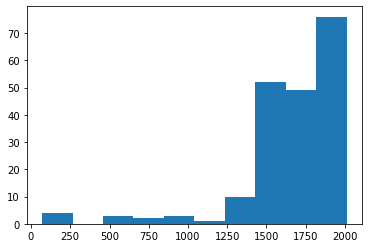

In [8]:
#plt.hist(datalist, bins = number of bins)
plt.hist(datalist)
plt.show()

Are there any duplicate values?

In [9]:
contains_duplicates = any(datalist.count(element) > 1 for element in datalist)
print(contains_duplicates)

False


So if the first value is 2010, the sum of the remaining two must be 10, so to save time, no use in looking at numbers larger than 9.

Start by sorting the list, largest value first.

In [10]:
dl = sorted(datalist, reverse = True)

In [11]:
b = -1
c = -1
match_found = False
while (len(dl) > 2):
    a = dl[0] # largest remaining value    
    candidates = [v for v in dl[1:] if v <= 2020 - a - 1]
    dl.pop(0)
    
    while (len(candidates) > 1):
        b = candidates[0]
        inner_list = candidates[1:]
        candidates.pop(0)
        
        while (len(inner_list) > 0):
            c = inner_list[0]
            inner_list.pop(0)
            
            if (a + b + c == 2020):
                dl = [] # drop list to end outer while loop
                candidates = []
                inner_list = []
                match_found = True
                break # break out of if loop

In [12]:
if (match_found):
    print(f"The numbers are: {a} and {b} and {c}, and the product is {a*b*c}.")
else:
    print(f"No matches found.")

The numbers are: 910 and 903 and 207, and the product is 170098110.
